In [40]:
import re
import numpy as np
from numpy import linalg as lg
from scipy.spatial import distance as dst
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
def transform(line):
    return list(filter(lambda x: len(x), re.split('[^a-z]', line.lower())))
    
    
def read(filename='sentences.txt'):
    return [transform(line) for line in open(filename, 'r')]


def create_key(sentences_list):
    key = dict()
    index = 0
    for line in sentences_list:
        for word in line:
            if word not in key:
                key[word] = index
                index += 1
    return key


def create_counter_matrix(sentences_list, sentences_dict):
    counter_matrix = np.zeros((len(sentences_list), len(sentences_dict.keys())))
    for i, sentence in enumerate(sentences_list):
        for j, word in enumerate(sentence):
            counter_matrix[i][sentences_dict[word]] += 1
    return counter_matrix


def get_distances(counter_matrix):
    distances = []
    for sentence in counter_matrix:
        distances.append(dst.cosine(counter_matrix[0], sentence))
    return distances
    
    
sentences_list = read()
sentences_dict = create_key(sentences_list)
counter_matrix = create_counter_matrix(sentences_list, sentences_dict)
distances = get_distances(counter_matrix)

In [27]:
distances

[0.0,
 0.9527544408738466,
 0.8644738145642124,
 0.8951715163278082,
 0.7770887149698589,
 0.9402385695332803,
 0.7327387580875756,
 0.9258750683338899,
 0.8842724875284311,
 0.9055088817476932,
 0.8328165362273942,
 0.8804771390665607,
 0.8396432548525454,
 0.8703592552895671,
 0.8740118423302576,
 0.9442721787424647,
 0.8406361854220809,
 0.956644501523794,
 0.9442721787424647,
 0.8885443574849294,
 0.8427572744917122,
 0.8250364469440588]

In [33]:
def test(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [47]:
def create_A_b_matrix(dots, power, func=test):
    A, b = [], []
    for dot in dots:
        A.append([dot ** n for n in range(power + 1)])
        b.append(func(dot))
    return np.array(A), np.array(b)


def solve(A, b):
    return lg.solve(A, b)


def make_visualization(w, power, r=np.linspace(1, 15, 100)):
    plt.plot(r, np.vectorize(test)(r))
    plt.plot(r, np.vectorize(lambda x: np.dot(w, [x ** n for n in range(power + 1)]))(r))
    
    
def epoch(dots, power):
    A, b = create_A_b_matrix(dots, power)
    w = solve(A, b)
    make_visualization(w, power)

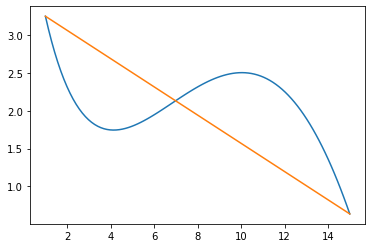

In [48]:
epoch([1, 15], 1)

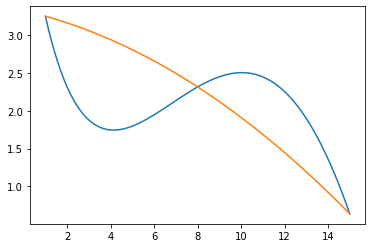

In [49]:
epoch([1, 8, 15], 2)

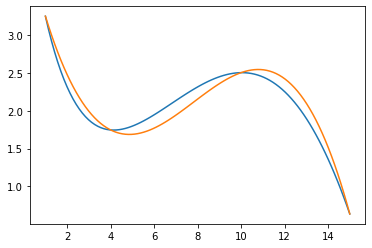

In [50]:
epoch([1, 4, 10, 15], 3)